In [1]:
%load_ext autoreload

# Swiss Roll Experiment

In [2]:
import os
import glob
import pickle
import imageio
import pandas as pd
import pyvista as pv

from itertools import product
from matplotlib import pyplot as plt

In [3]:
store_results = True

In [4]:
plot_order = ['dataset', 'ppca_2_components', 'lddmm', 'umap', 'ebm', 'ae', 'vae', 'naf', 'snf', 'fvae', 'nmf']

In [5]:
def read_plot_kwargs(file_name, file_extension='obj'):
    if file_extension == 'obj': f_read = lambda f: pickle.load(open(f,'rb'))
    if file_extension == 'png': f_read = lambda f: imageio.imread(f)
    if file_extension == 'txt': f_read = lambda f: [open(f, "r").read()]
                                                             
    objs = {os.path.normpath(f).split('/')[-2]:f_read(f)
            for f in glob.glob('../results/swiss_roll/*/{}.{}'.format(
                file_name, file_extension), recursive=True)}
    objs.pop('ppca_3_components')
    
    return objs

In [6]:
pv.set_plot_theme("document")
pv.set_jupyter_backend('None')

In [7]:
plot_shape = (6, 2)

In [8]:
def plotter_for_each_panel(axis, f_plot, plot_kwargs, plot_shape):
    keys = list(plot_kwargs.keys())
    keys.sort(key=lambda e: plot_order.index(e))
    n_keys = len(keys)
    for i in range(plot_shape[0]):
        for j in range(plot_shape[1]):
            index = i * plot_shape[1] + (j) 
            if index == n_keys:
                return
            key = keys[index]

            plotter.subplot(i, j)
            plotter.add_text(key, font_size=24)
            f_plot(**plot_kwargs[key], axis=axis)

def image_plotter_for_each_panel(imgs, plot_shape):
    keys = list(imgs.keys())
    keys.sort(key=lambda e: plot_order.index(e))
    max_index = min(plot_shape[0]*plot_shape[1], len(keys))
    for i in range(0, max_index):
        key = keys[i] 
        g = fig.add_subplot(*plot_shape, i+1)
        g.title.set_text(key)
        plt.axis('off')
        plt.imshow(imgs[key])

## Input Representation

In [9]:
imgs = read_plot_kwargs('base_representation', 'png')

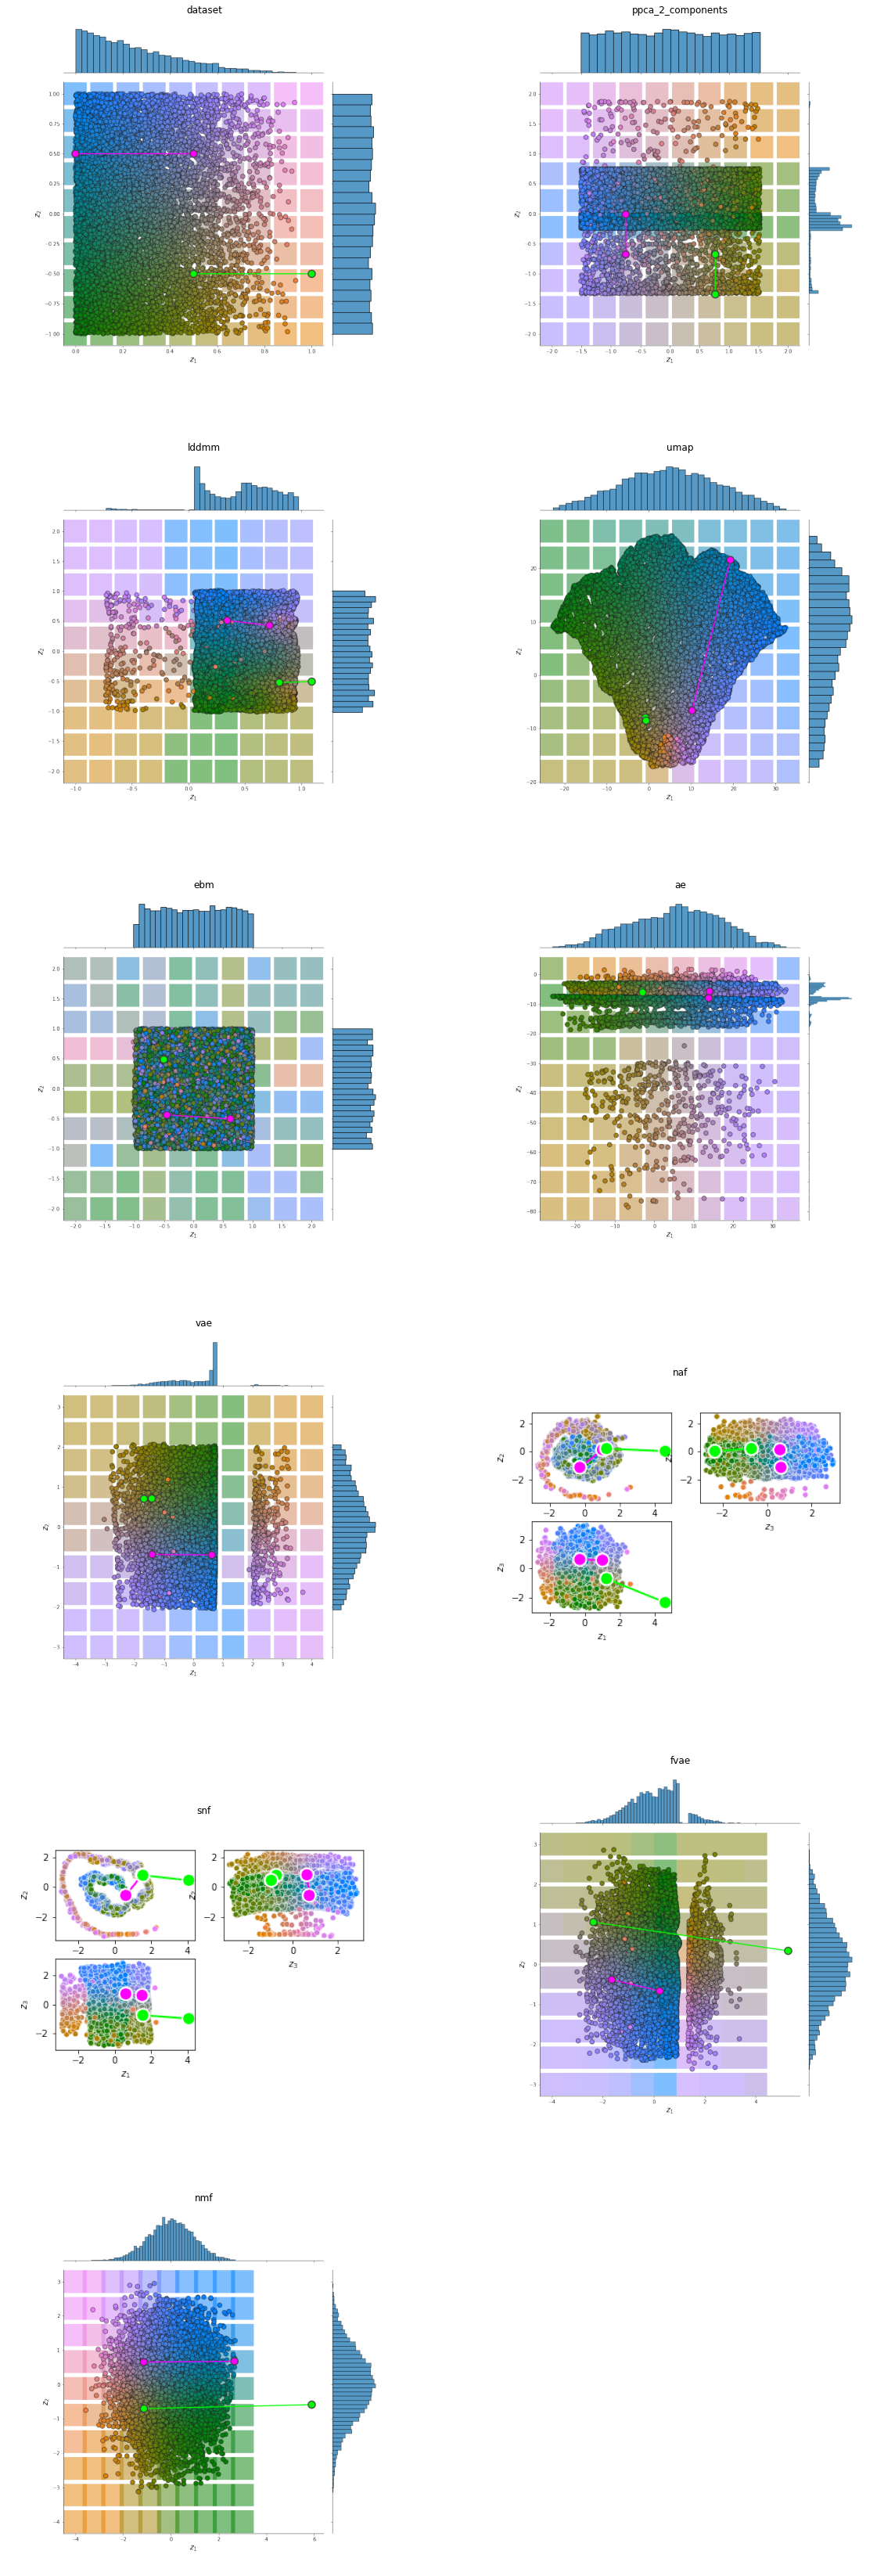

In [10]:
fig = plt.figure(figsize=(plot_shape[1]*10,plot_shape[0]*10))
image_plotter_for_each_panel(imgs, plot_shape)
plt.show()

## Input Reconstruction

In [25]:
mse_errors = read_plot_kwargs('reconstruction', 'txt')
df_reconstruction = pd.DataFrame.from_dict(mse_errors, orient='index', columns=['MSE'])
df_reconstruction.reindex(plot_order)

MSE
dataset                               NaN
ppca_2_components      10.422249043973492
lddmm                     5.1534423828125
umap                   1.7059484720230103
ebm                    138.17579650878906
ae                    0.19316305220127106
vae                    0.8526504635810852
naf                 8.028450793062802e-08
snf                2.8050467903995013e-07
fvae                   0.9597674012184143
nmf                     478.0296936035156

In [24]:
from pdmtut.vis import plot_reconstruction

plot_kwargs = read_plot_kwargs('reconstruction')

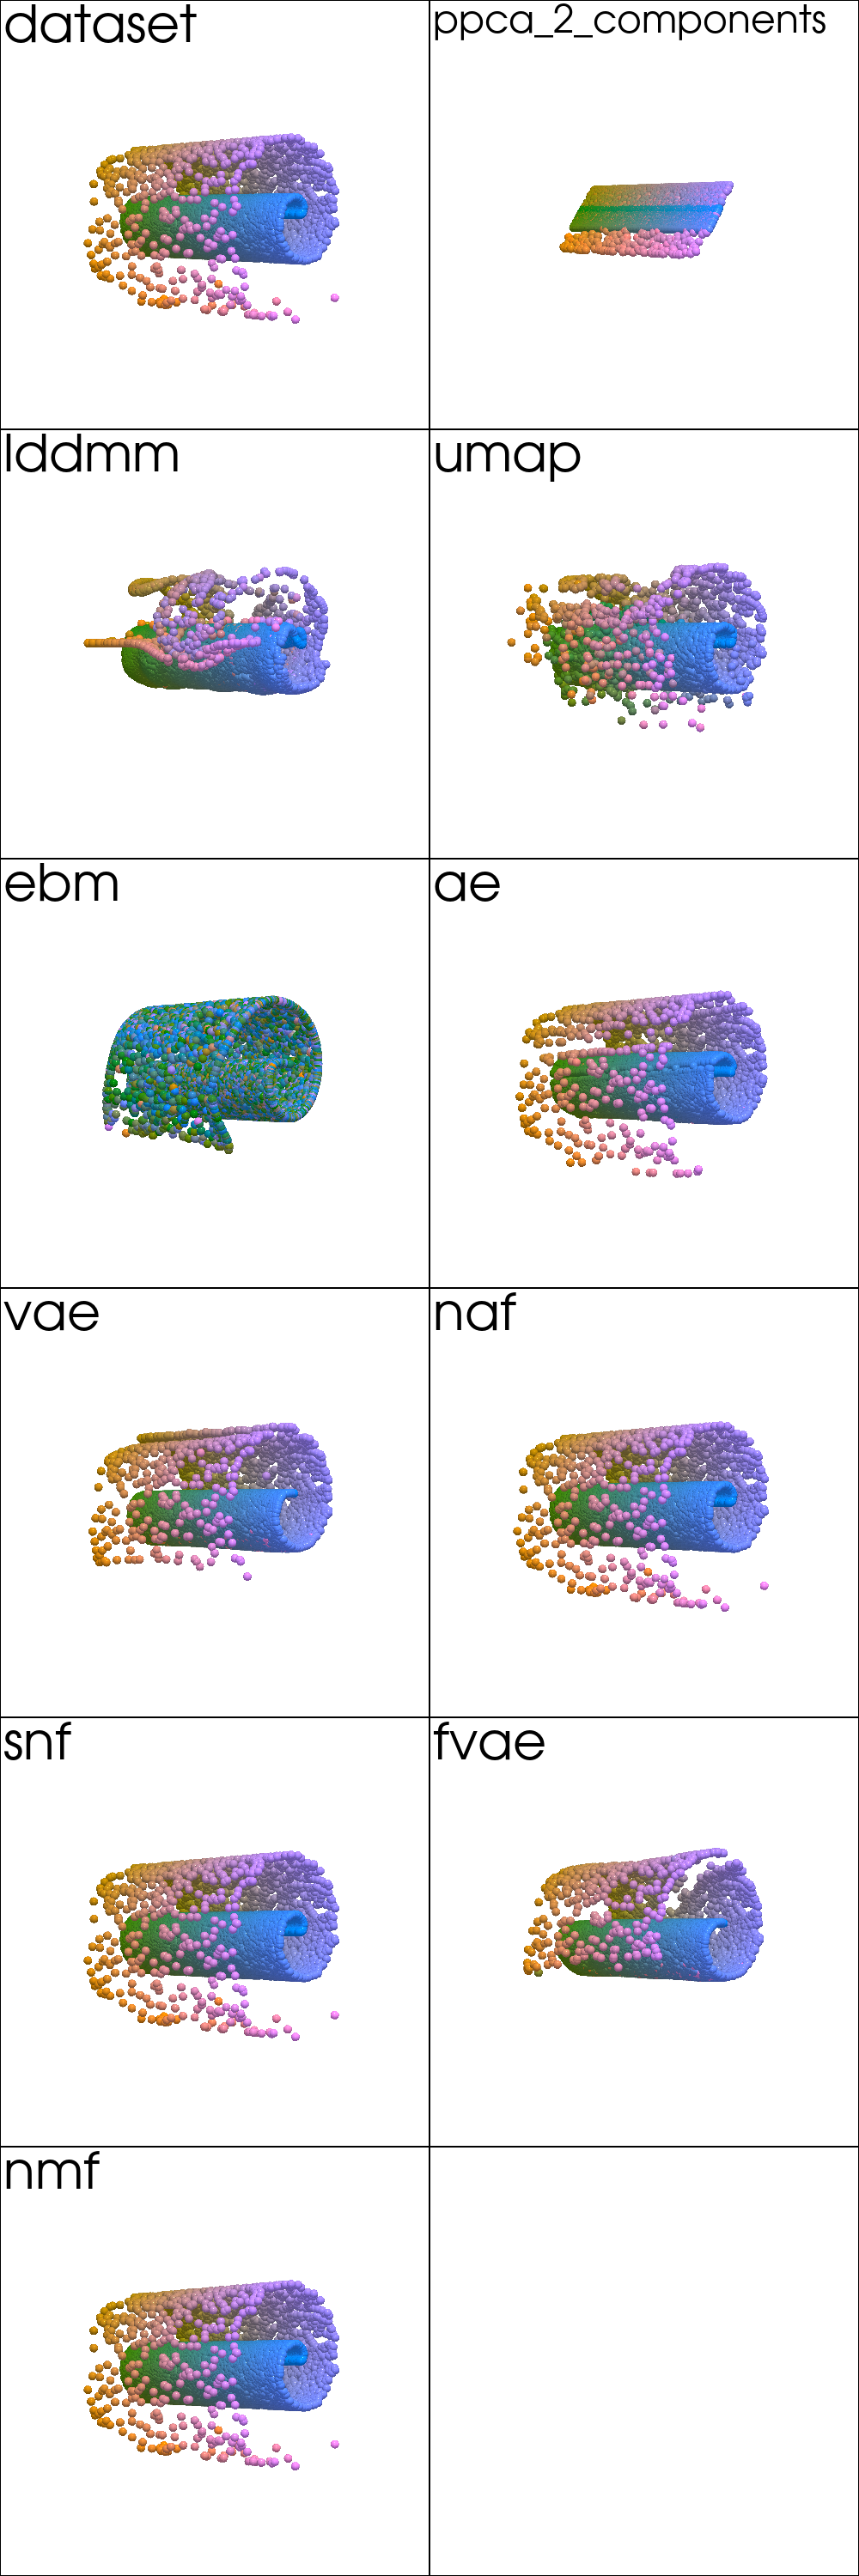

In [31]:
plotter = pv.Plotter(shape=plot_shape, window_size=(500*plot_shape[1], 500*plot_shape[0]))

plotter_for_each_panel(plotter, plot_reconstruction, plot_kwargs, plot_shape)

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()

## Density Estimation

In [24]:
data_log_likelihood = read_plot_kwargs('density', 'txt')
df_density = pd.DataFrame.from_dict(data_log_likelihood, orient='index', columns=['Log Likelihood'])
df_density.reindex(plot_order)

Log Likelihood
dataset                              NaN
ppca_2_components    -0.9320715096384685
lddmm                                1.0
umap                                 1.0
ebm                -0.009618597105145454
ae                                   1.0
vae                   0.7087732553482056
naf                    7.878046035766602
snf                    3.473109722137451
fvae                  0.4282466769218445
nmf                  -1.2739371061325073

In [33]:
from pdmtut.vis import plot_density

plot_kwargs = read_plot_kwargs('discrete_density')

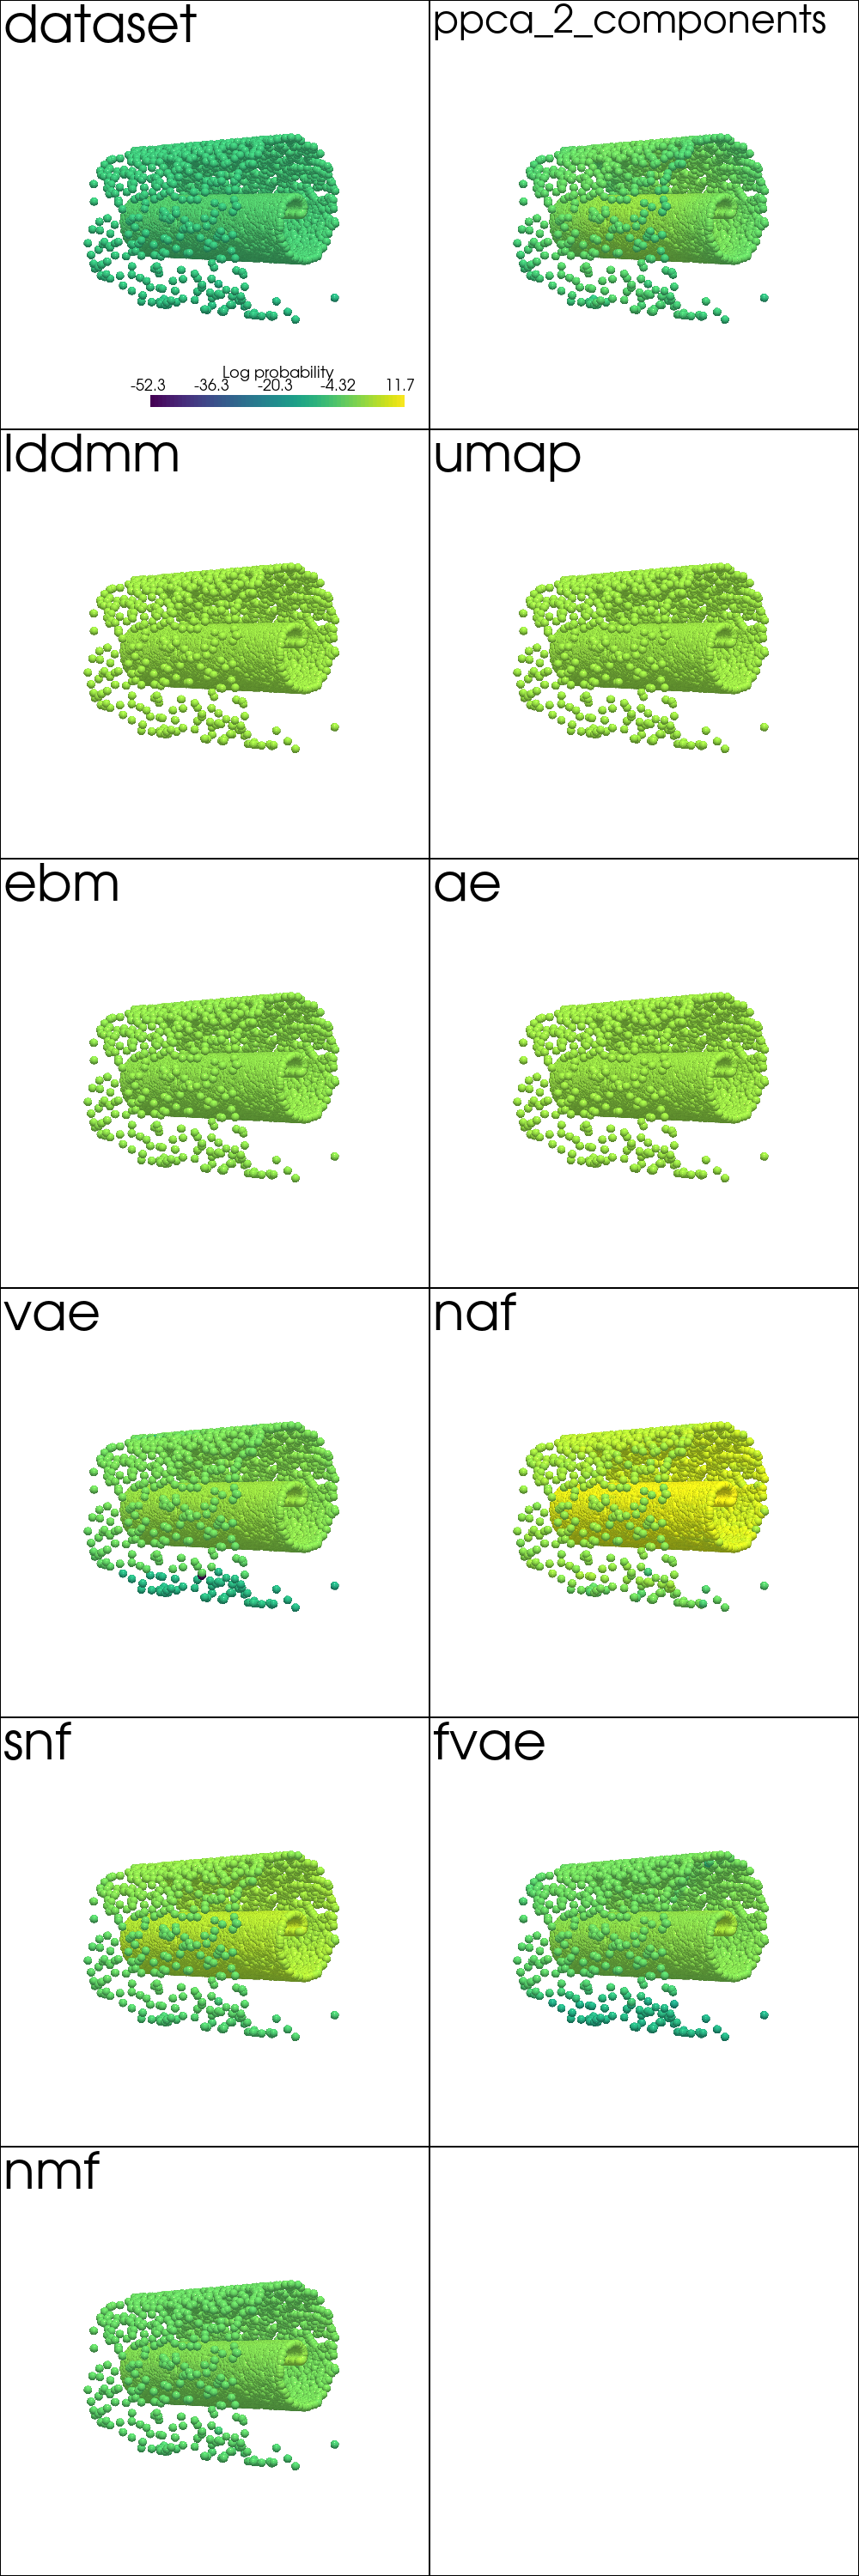

In [34]:
plotter = pv.Plotter(shape=plot_shape, window_size=(500*plot_shape[1], 500*plot_shape[0]))

plotter_for_each_panel(plotter, plot_density, plot_kwargs, plot_shape)

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()

## Generate Samples

In [36]:
from pdmtut.vis import plot_generated_samples

plot_kwargs = read_plot_kwargs('generated_samples')

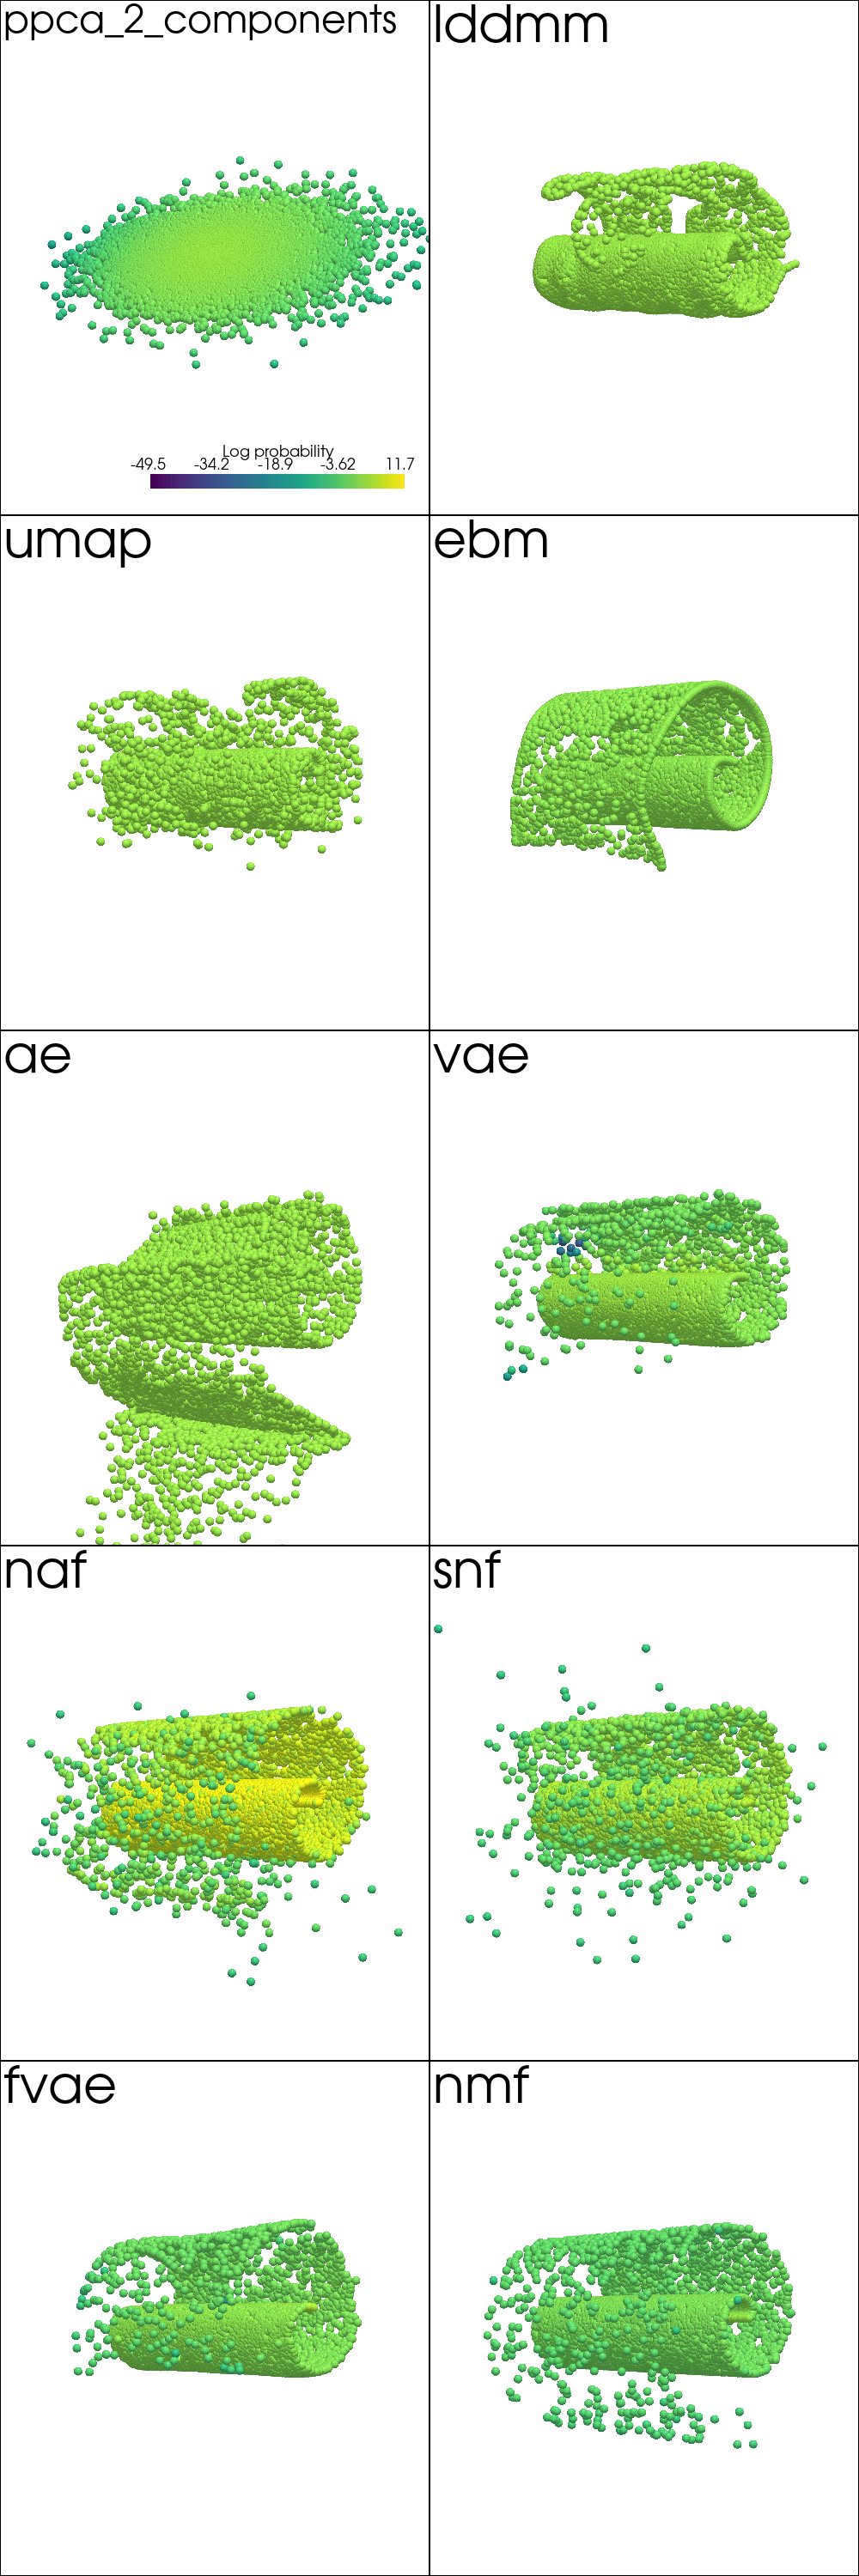

In [40]:
plotter = pv.Plotter(shape=(plot_shape[0]-1, plot_shape[1]), window_size=(500*plot_shape[1], 500*plot_shape[0]))

plotter_for_each_panel(plotter, plot_generated_samples, plot_kwargs, (plot_shape[0], plot_shape[1]))

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()

## Interpolation

In [41]:
from pdmtut.vis import plot_interpolation

plot_kwargs = read_plot_kwargs('interpolation')

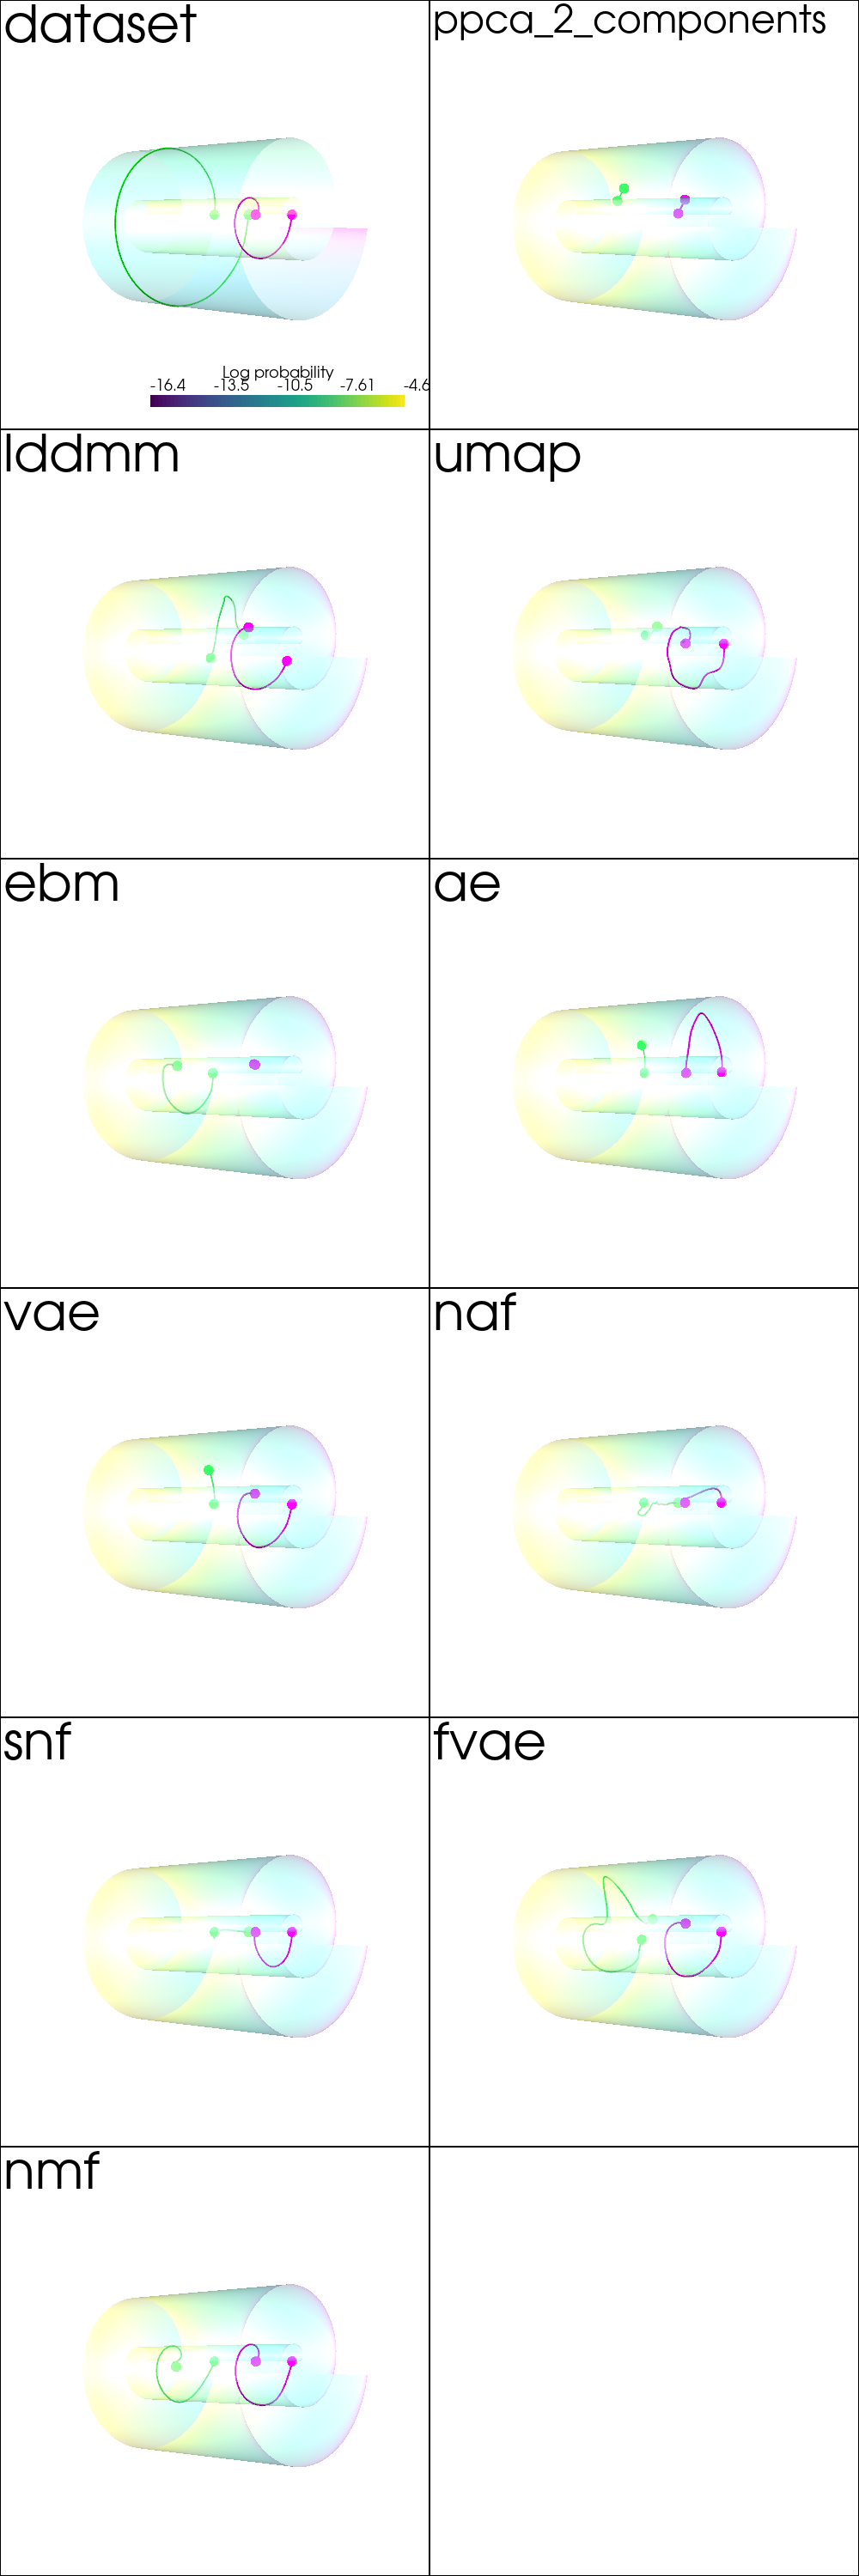

In [44]:
plotter = pv.Plotter(shape=plot_shape, window_size=(500*plot_shape[1], 500*plot_shape[0]))

plotter_for_each_panel(plotter, plot_interpolation, plot_kwargs, plot_shape)

plotter.link_views()
plotter.camera_position = [(-65, 0, 65), (0, 0, 0), (0, 1, 0)]
_ = plotter.show()

## Extra

In [41]:
table = pd.concat([df_reconstruction, df_density], axis=1)
print(table.reindex(plot_order).to_latex()) 

\begin{tabular}{lll}
\toprule
{} &                     MSE &         Log Likelihood \\
\midrule
dataset           &                     NaN &                    NaN \\
ppca\_2\_components &      10.422249043973492 &    -0.9320715096384685 \\
lddmm             &         5.1534423828125 &                    1.0 \\
umap              &      1.7059484720230103 &                    1.0 \\
ebm               &      138.17579650878906 &  -0.009618597105145454 \\
ae                &     0.19316305220127106 &                    1.0 \\
vae               &      0.8526504635810852 &     0.7087732553482056 \\
naf               &   8.028450793062802e-08 &      7.878046035766602 \\
snf               &  2.8050467903995013e-07 &      3.473109722137451 \\
fvae              &      0.9597674012184143 &     0.4282466769218445 \\
nmf               &       478.0296936035156 &    -1.2739371061325073 \\
\bottomrule
\end{tabular}

